## Basic Introduction to Example of PySpark ML Lib (Machine Learning Library)

#  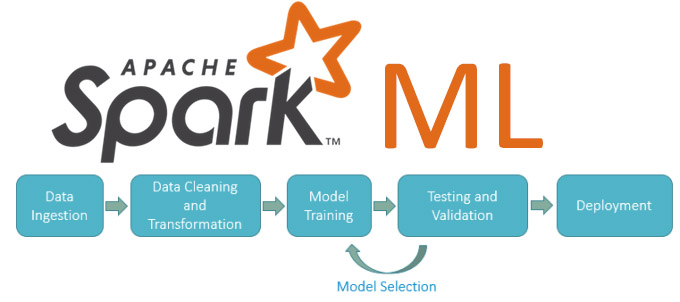

* Apache Spark offers a Machine Learning API called MLlib.
* PySpark has this machine learning API in Python as well. 
* It supports different kind of algorithms

# Some Of Algorithms is used there are 

## mllib.regression −
* Linear regression belongs to the family of regression algorithms.
* The goal of regression is to find relationships and dependencies between variables. 
* The interface for working with linear regression models and model summaries is similar to the logistic regression case.


## mllib.classification −
* The spark.mllib package supports various methods for binary classification, multiclass classification and regression analysis.
* Some of the most popular algorithms in classification are Random Forest, Naive Bayes, Decision Tree, etc.


## mllib.clustering − 
* Clustering is an unsupervised learning problem, whereby you aim to group subsets of entities with one another based on some notion of similarity.


## mllib.fpm − 
* Frequent pattern matching is mining frequent items, itemsets, subsequences or other substructures that are usually among the first steps to analyze a large-scale dataset. This has been an active research topic in data mining for years.

## mllib.linalg − 
* MLlib utilities for linear algebra.

## mllib.recommendation − 
* Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user item association matrix.

In [1]:
#### Basic ML Lib with Regression algorithms

In [2]:
import pyspark

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName('mllib').getOrCreate()

In [5]:
spark

In [6]:
## read the dataset
df=spark.read.csv('Employe.csv',header=True,inferSchema=True)

In [7]:
df.show()

+-------------+---+----------+------+
|         name|age|experience|salary|
+-------------+---+----------+------+
|Vineeth Reddy| 25|         2| 30000|
| Rakesh Reddy| 24|         1| 20000|
|    Sudhanshu| 32|         7|100000|
|   Krish Naik| 35|        10|150000|
|         abhi| 26|         3| 35000|
|        Ayush| 27|         4| 45000|
|      rithesh| 34|         6| 70000|
|      aravind| 25|         3| 35000|
|       hitesh| 27|         5| 55000|
+-------------+---+----------+------+



In [8]:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- experience: integer (nullable = true)
 |-- salary: integer (nullable = true)



In [9]:
df.columns

['name', 'age', 'experience', 'salary']

In [10]:
## vectorize the independent colums using VectorAssembler

In [11]:
from pyspark.ml.feature import VectorAssembler

In [12]:
feature_assmlr = VectorAssembler(inputCols=['age','experience'],outputCol='independent')

In [13]:
output =feature_assmlr.transform(df) 

In [14]:
output.show()

+-------------+---+----------+------+-----------+
|         name|age|experience|salary|independent|
+-------------+---+----------+------+-----------+
|Vineeth Reddy| 25|         2| 30000| [25.0,2.0]|
| Rakesh Reddy| 24|         1| 20000| [24.0,1.0]|
|    Sudhanshu| 32|         7|100000| [32.0,7.0]|
|   Krish Naik| 35|        10|150000|[35.0,10.0]|
|         abhi| 26|         3| 35000| [26.0,3.0]|
|        Ayush| 27|         4| 45000| [27.0,4.0]|
|      rithesh| 34|         6| 70000| [34.0,6.0]|
|      aravind| 25|         3| 35000| [25.0,3.0]|
|       hitesh| 27|         5| 55000| [27.0,5.0]|
+-------------+---+----------+------+-----------+



In [15]:
output.columns

['name', 'age', 'experience', 'salary', 'independent']

In [16]:
# take the data independent and dependent

In [17]:
finalized_data = output.select('independent','salary')

In [18]:
finalized_data.show()

+-----------+------+
|independent|salary|
+-----------+------+
| [25.0,2.0]| 30000|
| [24.0,1.0]| 20000|
| [32.0,7.0]|100000|
|[35.0,10.0]|150000|
| [26.0,3.0]| 35000|
| [27.0,4.0]| 45000|
| [34.0,6.0]| 70000|
| [25.0,3.0]| 35000|
| [27.0,5.0]| 55000|
+-----------+------+



### Splitting data trian and test  and  machione learning Model creation and prediction 

In [19]:
from pyspark.ml.regression import LinearRegression

In [20]:
# Splitting the data int test and train
train,test = finalized_data.randomSplit([0.75,0.25])

In [30]:
test.show()

+-----------+------+
|independent|salary|
+-----------+------+
| [24.0,1.0]| 20000|
| [27.0,4.0]| 45000|
+-----------+------+



In [31]:
regression = LinearRegression(featuresCol='independent',labelCol='salary')

In [32]:
regressor = regression.fit(train)

In [33]:
regressor.coefficients

DenseVector([-1193.609, 17114.6617])

In [34]:
regressor.intercept

14624.060150379282

In [35]:
pred_res = regressor.evaluate(test)

In [72]:
model = pred_res.predictions.show()

+-----------+------+------------------+
|independent|salary|        prediction|
+-----------+------+------------------+
| [24.0,1.0]| 20000|3092.1052631577586|
| [27.0,4.0]| 45000| 50855.26315789482|
+-----------+------+------------------+



In [71]:
print('MAE',pred_res.meanAbsoluteError)
print('MSE',pred_res.meanSquaredError)
print('RMS',pred_res.rootMeanSquaredError)

MAE 11381.57894736853
MSE 160080505.54016897
RMS 12652.292501367843
